In [1]:
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt  
from keras.utils import np_utils 
from sklearn import preprocessing
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from numpy import newaxis
%matplotlib inline

Using TensorFlow backend.


### Set important variables 

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

### Split the data into train and test 

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [0]:
if K.image_data_format() == 'channelsa_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


### Lets visualize the data 

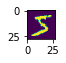

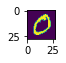

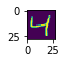

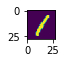

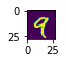

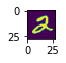

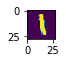

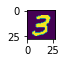

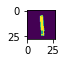

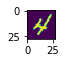

In [7]:
for i in range(10):
  plt.subplot(1,10,i+1)
  #plt.imshow(x_train[i])
  plt.imshow(x_train[i].reshape(28,28))
  plt.show()
  


### One hot encode the outputs: 
    

*   Actual label: 5
*   Encode lable = [0 0 0 0 0 1 0 0 0 0]



In [8]:
print(y_train[0])


y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


print(y_train[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Norrmalize your Inputs

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Build the Convoutional NN

In [10]:
model = Sequential()

#bottle neck model
model.add(Conv2D(filters=32 ,input_shape=input_shape , kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#Flatten the input data
model.add(Flatten())

#Neural Network
model.add(Dense(output_dim=128, activation='relu'))
model.add(Dropout(0.5))

#Softmax classifier
model.add(Dense(output_dim=num_classes, activation='softmax'))

model.summary()


W0615 16:40:19.924594 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 16:40:19.944845 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 16:40:19.947804 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 16:40:19.978451 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 16:40:19.981363 139738565678976 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))

W0615 16:40:20.074987 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 16:40:20.101289 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 16:40:20.189375 139738565678976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2425 - acc: 0.9247 - val_loss: 0.0534 - val_acc: 0.9823
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0956 - acc: 0.9721 - val_loss: 0.0444 - val_acc: 0.9851
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0722 - acc: 0.9783 - val_loss: 0.0361 - val_acc: 0.9882
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0319 - val_acc: 0.9901
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0549 - acc: 0.9833 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0297 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0448 - acc: 0.9858 - val_loss: 0.0271 - val_ac

## Evaluating The built model 

In [12]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.02771972013284312
Test accuracy: 0.9934


### Dynamic plotting of loss

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty,  colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

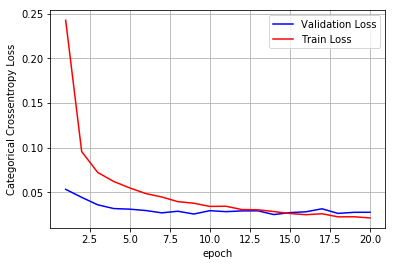

In [41]:
%matplotlib inline
vy = history.history['val_loss']
ty = history.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

### Prediction 

In [15]:
x_train[9752].shape

(28, 28, 1)

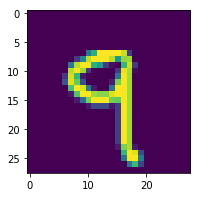

In [42]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[9752].reshape(28,28))


In [43]:
print("The Predict value is :")
print(model.predict(np.array([x_train[9752]])).argmax())

The Predict value is :
9


In [0]:
summary=[]
summary.append(['Model',history.history['val_loss'][-1],history.history['loss'][-1],score[1]])

### Model 2

     --3 layer convolution with 3 x 3 kernal.
     --With max pools after 2 layer and 1 post 3rd layer.
     --With Batch normalization and droputs. 

In [19]:
model_2 = Sequential()

#bottle neck model_2
model_2.add(Conv2D(filters=32 ,input_shape=input_shape , kernel_size=(3, 3),activation='relu'))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Conv2D(filters=128 , kernel_size=(3, 3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#Flatten the input data
model_2.add(Flatten())

#Neural Network
model_2.add(Dense(output_dim=128, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim=64, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#Softmax classifier
model_2.add(Dense(output_dim=num_classes, activation='softmax'))

model_2.summary()


W0615 16:42:04.246941 139738565678976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [20]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_2=model_2.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.4248 - acc: 0.8739 - val_loss: 0.0637 - val_acc: 0.9806
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1364 - acc: 0.9618 - val_loss: 0.0416 - val_acc: 0.9853
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1031 - acc: 0.9712 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0863 - acc: 0.9761 - val_loss: 0.0370 - val_acc: 0.9877
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0752 - acc: 0.9784 - val_loss: 0.0292 - val_acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0685 - acc: 0.9807 - val_loss: 0.0270 - val_acc: 0.9913
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0649 - acc: 0.9823 - val_loss: 0.0326 -

## Evaluating The built model 

In [21]:
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0218248584106841
Test accuracy: 0.9931


### Dynamic plotting of loss

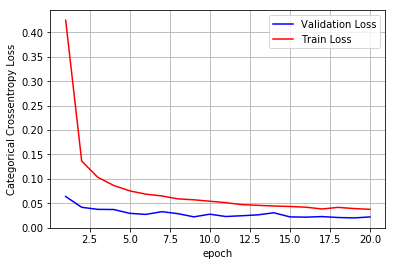

In [44]:
vy = history_2.history['val_loss']
ty = history_2.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

In [0]:
summary.append(['Model_1',history_2.history['val_loss'][-1],history_2.history['loss'][-1],score[1]])

### Prediction 

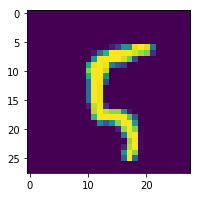

In [45]:

fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[100].reshape(28,28))


In [46]:
print("The Predict value is :")
print(model_2.predict(np.array([x_train[100]])).argmax())

The Predict value is :
5


### Model 3

     --5 layer convolution with 2 x 2 kernal.
     --With max pools after 2 layers each and post 5th layer.
     --With Batch normalization and droputs. 

In [26]:
model_3 = Sequential()

#bottle neck model_3
model_3.add(Conv2D(filters=32 ,input_shape=input_shape , kernel_size=(2, 2),activation='relu'))
model_3.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Conv2D(filters=128 , kernel_size=(2, 2),activation='relu'))
model_3.add(Conv2D(filters=256, kernel_size=(2, 2), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Conv2D(filters=512 , kernel_size=(2, 2),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

#Flatten the input data
model_3.add(Flatten())

#Neural Network
model_3.add(Dense(output_dim=128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim=64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

#Softmax classifier
model_3.add(Dense(output_dim=num_classes, activation='softmax'))

model_3.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [27]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_3=model_3.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.5428 - acc: 0.8371 - val_loss: 0.1063 - val_acc: 0.9691
Epoch 2/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.1526 - acc: 0.9568 - val_loss: 0.0413 - val_acc: 0.9873
Epoch 3/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1088 - acc: 0.9701 - val_loss: 0.0357 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0902 - acc: 0.9745 - val_loss: 0.0338 - val_acc: 0.9897
Epoch 5/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0817 - acc: 0.9770 - val_loss: 0.0305 - val_acc: 0.9911
Epoch 6/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0730 - acc: 0.9790 - val_loss: 0.0289 - val_acc: 0.9922
Epoch 7/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0661 - acc: 0.9817 - val_loss: 0.

## Evaluating The built model 

In [28]:
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.018117401196920402
Test accuracy: 0.9945


### Dynamic plotting of loss

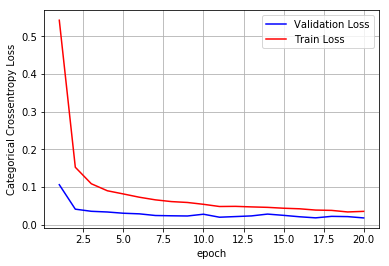

In [47]:
vy = history_3.history['val_loss']
ty = history_3.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

In [0]:
summary.append(['Model_3',history_3.history['val_loss'][-1],history_3.history['loss'][-1],score[1]])

### Prediction 

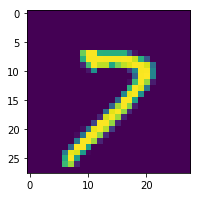

In [48]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[567].reshape(28,28))


In [32]:
print("The Predict value is :")
print(model_3.predict(np.array([x_train[567]])).argmax())

The Predict value is :
7


### Model 4

     --7 layer convolution with 5 x 5 kernal.
     --With max pools after 2 layers each and post 7th layer.
     --With Batch normalization and droputs. 

In [33]:
K.set_image_dim_ordering('tf')
model_4 = Sequential()

#bottle neck model_4
model_4.add(Conv2D(filters=64 ,padding='same',input_shape=input_shape , kernel_size=(4, 4),activation='relu'))
model_4.add(Conv2D(filters=64, padding='same',kernel_size=(4, 4), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Conv2D(filters=128 ,padding='same', kernel_size=(4,4),activation='relu'))
model_4.add(Conv2D(filters=128,padding='same', kernel_size=(4, 4), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Conv2D(filters=256  ,padding='same', kernel_size=(4,4),activation='relu'))
model_4.add(Conv2D(filters=256,padding='same', kernel_size=(4,4), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Conv2D(filters=512  ,padding='same', kernel_size=(4,4),activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

#Flatten the input data
model_4.add(Flatten())

#Neural Network
model_4.add(Dense(output_dim=128, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Dense(output_dim=64, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

model_4.add(Dense(output_dim=32, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))

#Softmax classifier
model_4.add(Dense(output_dim=num_classes, activation='softmax'))

model_4.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       131200    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       262272    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [34]:
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_4=model_4.fit(x_train,y_train,batch_size=100 ,epochs=20,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 614us/step - loss: 1.1421 - acc: 0.6382 - val_loss: 0.1652 - val_acc: 0.9605
Epoch 2/20
60000/60000 [==============================] - 33s 556us/step - loss: 0.2722 - acc: 0.9339 - val_loss: 0.0472 - val_acc: 0.9884
Epoch 3/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.1635 - acc: 0.9626 - val_loss: 0.0934 - val_acc: 0.9805
Epoch 4/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.1296 - acc: 0.9719 - val_loss: 0.0433 - val_acc: 0.9905
Epoch 5/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.1108 - acc: 0.9767 - val_loss: 0.0470 - val_acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 33s 554us/step - loss: 0.1015 - acc: 0.9795 - val_loss: 0.0397 - val_acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 33s 554us/step - loss: 0.0937 - acc: 0.9808 - val_loss: 0.

## Evaluating The built model 

In [35]:
score = model_4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.024707217908122404
Test accuracy: 0.9949


### Dynamic plotting of loss

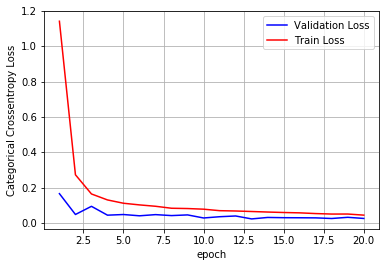

In [49]:
vy = history_4.history['val_loss']
ty = history_4.history['loss']


# list of epoch numbers
x = list(range(1,20+1))

plt_dynamic(x, vy, ty)

In [0]:
summary.append(['Model_4',history_4.history['val_loss'][-1],history_4.history['loss'][-1],score[1]])

### Prediction 

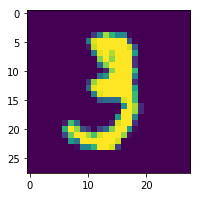

In [50]:
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.imshow(x_train[10].reshape(28,28))


In [39]:
print("The Predict value is :")
print(model_4.predict(np.array([x_train[10]])).argmax())

The Predict value is :
3


## OUTPUT

In [0]:
import pandas as pd
df=pd.DataFrame(summary)
df.columns= ['Model','Test Loss','Train Loss','Test Accuracy']

In [54]:
df

,Model,Test Loss,Train Loss,Test Accuracy
0,Model,0.027720,0.021407,0.9934
1,Model_1,0.021825,0.037399,0.9931
2,Model_3,0.018117,0.035522,0.9945
3,Model_4,0.024707,0.043504,0.9949
